In [1]:
import numpy as np
import pandas as pd

In [2]:
iris= pd.read_csv(r"/iris.csv", header=0)

In [3]:
iris.head()

,sepal_length,sepal_width,petal _length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal _length  150 non-null    float64
 3   petal_width    150 non-null    float64
 4   target         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

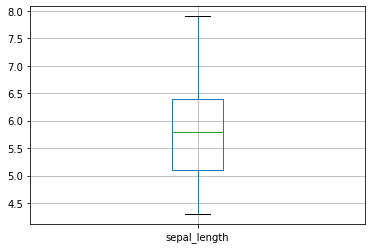

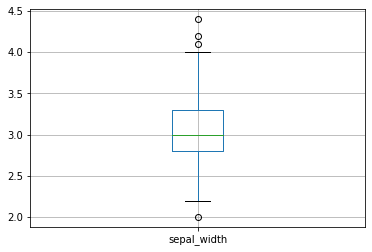

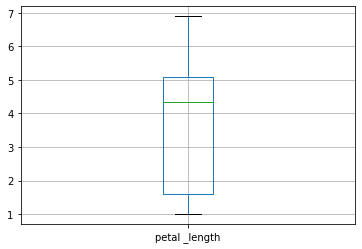

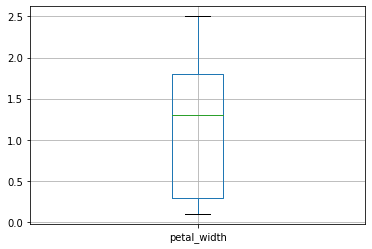

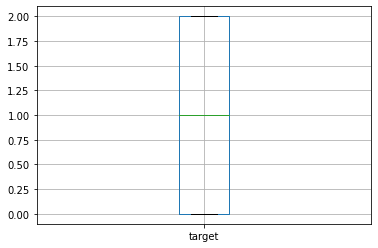

In [8]:
for i in iris.columns:
  iris.boxplot(column=i)
  plt.show()

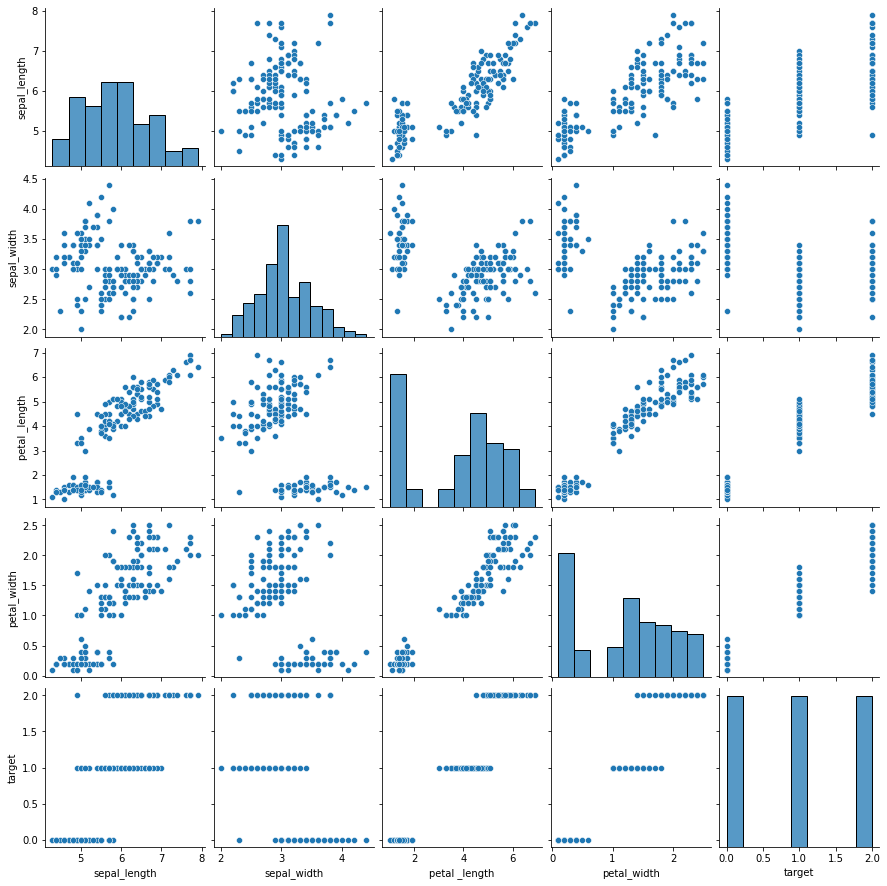

In [10]:
sns.pairplot(data=iris)

In [25]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal _length', 'petal_width',
       'target'],
      dtype='object')

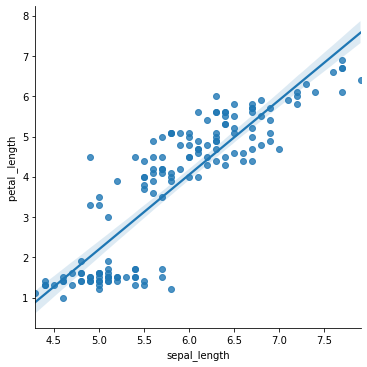

In [44]:
sns.lmplot(data=iris, x="sepal_length",y="petal _length")

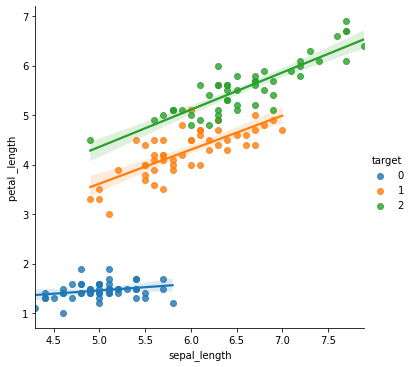

In [45]:
sns.lmplot(data=iris, x="sepal_length",y="petal _length", hue="target")

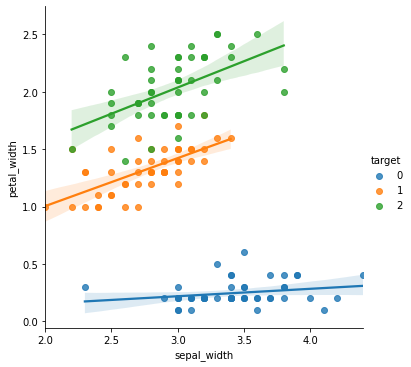

In [42]:
sns.lmplot(data=iris, x="sepal_width", y="petal_width", hue="target")

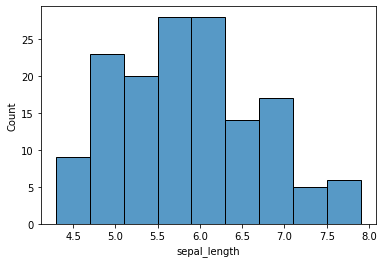

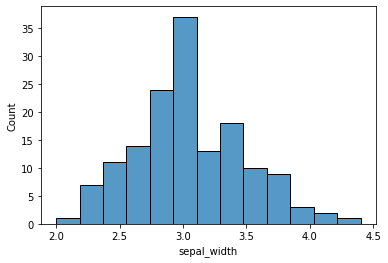

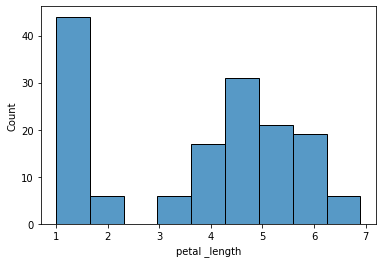

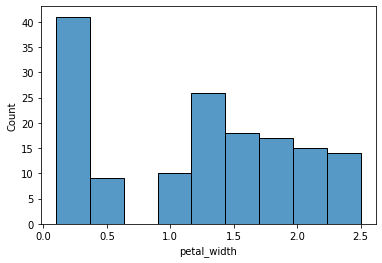

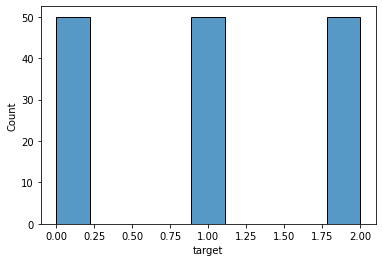

In [55]:
for i in iris.columns:
  sns.histplot(data=iris, x=i)
  plt.show()

In [62]:
X=iris.iloc[:,:-1]
Y=iris["target"]
print(X.shape, Y.shape)

(150, 4) (150,)


In [70]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [63]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [66]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
model_svc=SVC(kernel="rbf", C=1, random_state=0)
model_svc.fit(X_train, Y_train)
SVC_pred=model_svc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, SVC_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, SVC_pred))
print("Classification_report:\n", classification_report(Y_test, SVC_pred))

Accuracy Score:
 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [82]:
model_svc.score(X_test,Y_test)

0.9666666666666667

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model_dt=DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
model_dt.fit(X_train, Y_train)
DT_pred=model_dt.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, DT_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, DT_pred))
print("Classification_report:\n", classification_report(Y_test, DT_pred))

Accuracy Score:
 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [85]:
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
model_et=ExtraTreesClassifier(n_estimators=100, random_state=10)
model_et.fit(X_train, Y_train)
ET_pred=model_et.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, ET_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, ET_pred))
print("Classification_report:\n", classification_report(Y_test, ET_pred))

Accuracy Score:
 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model_rf=RandomForestClassifier(n_estimators=100, random_state=10)
model_rf.fit(X_train, Y_train)
RF_pred=model_rf.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, RF_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, RF_pred))
print("Classification_report:\n", classification_report(Y_test, RF_pred))

Accuracy Score:
 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

